In [1]:
# 18222757 Maciej Augustynek ,18244327 Bartlomiej Skorecki
# Code executes till the end without errors
# Original source : https://www.kaggle.com/esraamohamedahmed/classification-of-butterflies-images

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import os
from tensorflow.keras.metrics import Precision , Recall

In [3]:
import cv2
path='./images/'
file=os.listdir('./images/')
features=[] #to store images
labels=[] #to store labels
for img in file:
    # label=int(img) 
    label=int(img[:3]) #extracts label from the image file name
    labels.append(label) #adds the found label to the list of labels
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
    #Resizes images into the size 224x224
    img_array=cv2.resize(img_array,(224,224))
    #stores images in the array
    features.append(img_array)

In [4]:
import os
descrid_path='./descriptions'
descrid=os.listdir('./descriptions')
descrid

['001.txt',
 '002.txt',
 '003.txt',
 '004.txt',
 '005.txt',
 '006.txt',
 '007.txt',
 '008.txt',
 '009.txt',
 '010.txt']

In [5]:
#Creating a list of butterfly types
dict_1={'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'} 

In [6]:
print(set(labels))
list_labels=[]
#We add labels to a set for each image in the dataset. We will use this list later to assign the labels to the images.
for i in labels:
    new_label=dict_1['00'+str(i)]
    list_labels.append(new_label)
#Printed unique labels from the labels added
print(set(list_labels)) 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{'Nymphalis_antiopa', 'Junonia_coenia', 'Vanessa_cardui', 'Danaus_plexippus', 'Lycaena_phlaeas', 'Papilio_cresphontes', 'Vanessa_atalanta', 'Heliconius_charitonius', 'Heliconius_erato', 'Pieris_rapae'}


In [7]:
import numpy as np
#We change the 220x220 images into a numpy array to make it easier for them to work with the model
features=np.array(features)
#Normalising the images
features=features/255.0
features=features.reshape(-1,227,227,3)
print(features.shape)

(832, 227, 227, 3)


In [8]:
#OneHotEncoding:To deal with categorical values we need to preprocess it using onehot ecnoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#One hot encoding coverts our labels so they can be processed by the ML model better to get a better prediction
le=LabelEncoder()
#Fits our labels into the LabelEncoder and returns the transformed data
y=le.fit_transform(list_labels)
from tensorflow.keras.utils import to_categorical
#Needs to be changed to to_categorical since we have more than 2 classes to be identified
y=to_categorical(y)

In [9]:
from sklearn.model_selection import train_test_split
#Splits our data into our training and test dataset. Our test data is 20% of the overall data and training data is 80%
x_train,x_test,y_train,y_test=train_test_split(features,y,random_state=11,test_size=0.2)

In [10]:
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras import layers
import tensorflow as tf


#Our data in the model will also be copied and flipped to perform augmentation. This will lead to a better accuracy and it will generalise features better
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

#Building the model
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier. Also added augmented data that has been flipped and rotated
  data_augmentation,
])


# Allows us to create multiple layers to use a CNN structure. We are using a AlexNet implementation modified for overfitting
model.add(Conv2D(32, (3,3), padding="same", activation = 'relu', kernel_regularizer=l2(0.0002) , input_shape=(227,227,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))


model.add(Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))


model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu' , kernel_regularizer=l2(0.0002))) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
# Dropout layer used to help reduce overfitting

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

# Output layer have 10 labels 
model.add(Dense(10, activation='softmax'))



In [11]:
import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(0.01)

model.compile(optimizer='adam'
              ,metrics=['accuracy',Precision(), Recall()],loss='categorical_crossentropy')

# Training of the model
history=model.fit(x_train,y_train,batch_size=12,epochs=50,validation_split=0.2)
model.summary()

Epoch 1/50
45/45 [==============================] - 16s 326ms/step - loss: 2.3356 - accuracy: 0.2462 - precision: 0.3285 - recall: 0.0846 - val_loss: 2.3882 - val_accuracy: 0.1203 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
45/45 [==============================] - 14s 316ms/step - loss: 1.7937 - accuracy: 0.3741 - precision: 0.5602 - recall: 0.2011 - val_loss: 2.5993 - val_accuracy: 0.1579 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
45/45 [==============================] - 14s 313ms/step - loss: 1.5213 - accuracy: 0.4737 - precision: 0.5973 - recall: 0.2538 - val_loss: 2.7002 - val_accuracy: 0.0902 - val_precision: 0.7778 - val_recall: 0.0526
Epoch 4/50
45/45 [==============================] - 14s 312ms/step - loss: 1.2625 - accuracy: 0.5602 - precision: 0.7427 - recall: 0.4286 - val_loss: 3.0036 - val_accuracy: 0.0827 - val_precision: 0.1507 - val_recall: 0.0827
Epoch 5/50
45/45 [==============================] - 14s 311ms/step - loss: 1.1442 - 

45/45 [==============================] - 14s 313ms/step - loss: 0.2307 - accuracy: 0.9643 - precision: 0.9693 - recall: 0.9511 - val_loss: 0.3405 - val_accuracy: 0.9023 - val_precision: 0.9302 - val_recall: 0.9023
Epoch 38/50
45/45 [==============================] - 14s 314ms/step - loss: 0.3347 - accuracy: 0.9229 - precision: 0.9328 - recall: 0.9135 - val_loss: 0.4015 - val_accuracy: 0.8947 - val_precision: 0.9225 - val_recall: 0.8947
Epoch 39/50
45/45 [==============================] - 14s 317ms/step - loss: 0.2993 - accuracy: 0.9361 - precision: 0.9441 - recall: 0.9211 - val_loss: 0.3062 - val_accuracy: 0.9248 - val_precision: 0.9313 - val_recall: 0.9173
Epoch 40/50
45/45 [==============================] - 14s 316ms/step - loss: 0.2942 - accuracy: 0.9511 - precision: 0.9559 - recall: 0.9361 - val_loss: 0.7558 - val_accuracy: 0.7820 - val_precision: 0.8047 - val_recall: 0.7744
Epoch 41/50
45/45 [==============================] - 14s 314ms/step - loss: 0.4556 - accuracy: 0.9060 - prec

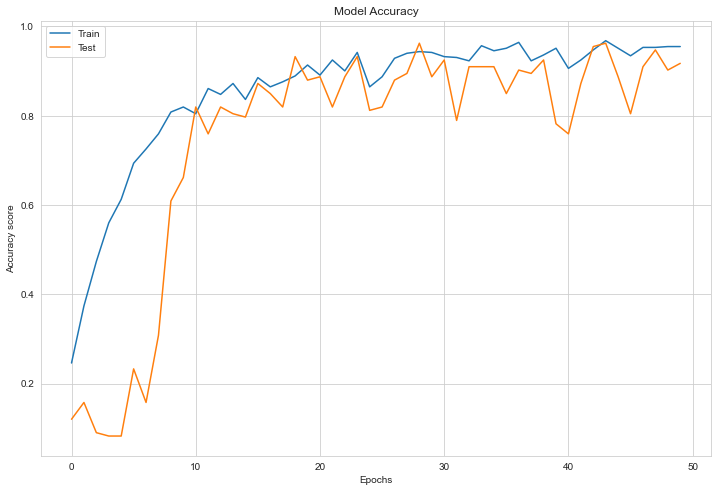

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [13]:
loss,accuracy,precision,recall=model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 132ms/step - loss: 0.5338 - accuracy: 0.8743 - precision: 0.8902 - recall: 0.8743


In [14]:
import tensorflow
# This network has many hyper parameters that you have to adjust first
# The first hyperparameter gives you the freedom to choose whether to enter the final dense layer of the network or cancel it, in which case it has been cancelled.
# By specifying include_top= False we exclude the prediction layer which allows us to substitute our custom prediction layer later on.
mnet = tensorflow.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, 
                                                      input_shape=(227, 227, 3),#same as of custom model
                                                      pooling='avg',
                                                      weights='imagenet')

mnet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 114, 114, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 114, 114, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [15]:
model2=tf.keras.Sequential([
    mnet,
    Dropout(0.25),
    Dense(10,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
    
])


In [16]:
# here we freezed the layer that responsible for feature extraction
model2.layers[0].trainable = False


In [17]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',Precision(), Recall()])
#Here we supply our training data to the mobilenet model.
history2=model2.fit(x_train,y_train,batch_size=12, epochs=20,validation_split=0.3)
model2.summary()

Epoch 1/20
39/39 [==============================] - 12s 278ms/step - loss: 1.7988 - accuracy: 0.4258 - precision_1: 0.7907 - recall_1: 0.0731 - val_loss: 1.1180 - val_accuracy: 0.7400 - val_precision_1: 0.9219 - val_recall_1: 0.2950
Epoch 2/20
39/39 [==============================] - 10s 266ms/step - loss: 0.8204 - accuracy: 0.8366 - precision_1: 0.9544 - recall_1: 0.4946 - val_loss: 0.6126 - val_accuracy: 0.9100 - val_precision_1: 0.9848 - val_recall_1: 0.6500
Epoch 3/20
39/39 [==============================] - 10s 258ms/step - loss: 0.4872 - accuracy: 0.9204 - precision_1: 0.9804 - recall_1: 0.7527 - val_loss: 0.4472 - val_accuracy: 0.9300 - val_precision_1: 0.9879 - val_recall_1: 0.8150
Epoch 4/20
39/39 [==============================] - 10s 264ms/step - loss: 0.3248 - accuracy: 0.9613 - precision_1: 0.9877 - recall_1: 0.8667 - val_loss: 0.3551 - val_accuracy: 0.9400 - val_precision_1: 0.9775 - val_recall_1: 0.8700
Epoch 5/20
39/39 [==============================] - 10s 259ms/step -

6/6 [==============================] - 2s 387ms/step - loss: 0.1713 - accuracy: 0.9521 - precision_1: 0.9814 - recall_1: 0.9461


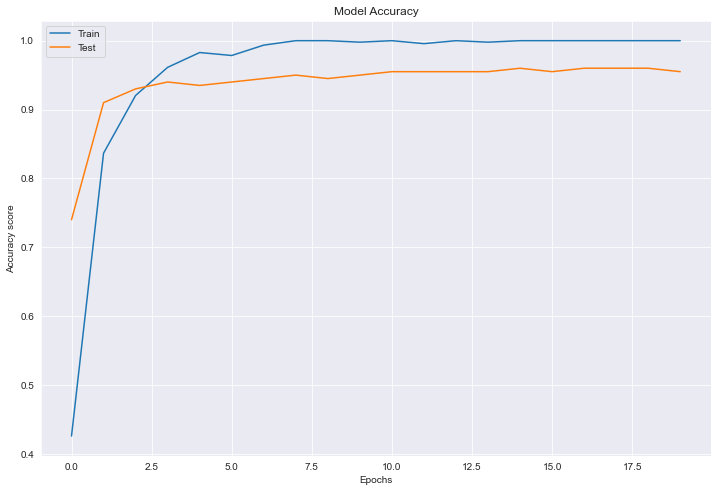

In [18]:
loss,accuracy,precision,recall=model2.evaluate(x_test,y_test)
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

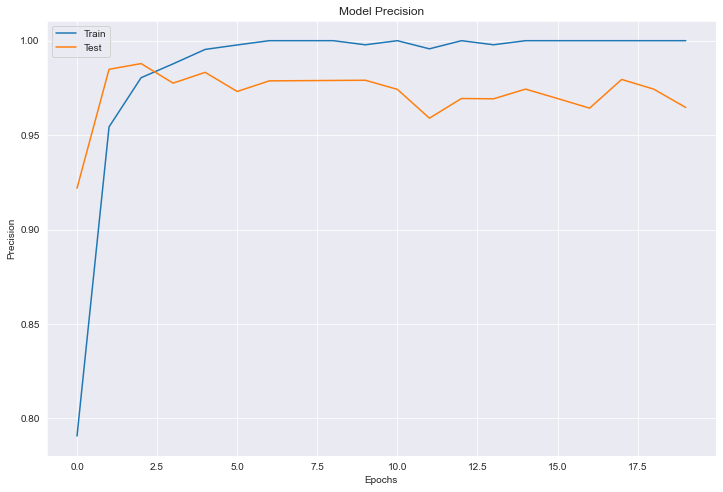

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['precision_1'])
plt.plot(history2.history['val_precision_1'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Model Precision')
plt.legend(['Train','Test'])
plt.show()

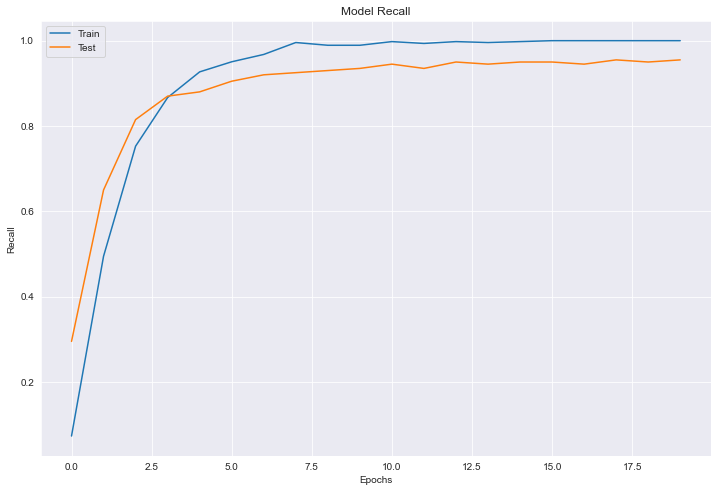

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['recall_1'])
plt.plot(history2.history['val_recall_1'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Model Recall')
plt.legend(['Train','Test'])
plt.show()

In [21]:
print(history2.history['accuracy'])

[0.42580646276474, 0.8365591168403625, 0.9204301238059998, 0.9612902998924255, 0.9827957153320312, 0.9784946441650391, 0.9935483932495117, 1.0, 1.0, 0.9978494644165039, 1.0, 0.9956989288330078, 1.0, 0.9978494644165039, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [22]:
sumTrain = 0
sumTest = 0
for x in history2.history['recall_1']:
    sumTrain += x
    
for x in history2.history['val_recall_1']:
    sumTest += x

print("")
print("Average Train Recall:")
print(sumTrain / len(history2.history['recall_1']))

print("")
print("Average Test Recall:")
print(sumTest / len(history2.history['val_recall_1']))




Average Train Recall:
0.899462366476655

Average Test Recall:
0.8802499935030937


In [23]:
sumTrain = 0
sumTest = 0
for x in history2.history['accuracy']:
    sumTrain += x
    
for x in history2.history['val_accuracy']:
    sumTest += x

print("")
print("Average Train Accuracy:")
print(sumTrain / len(history2.history['accuracy']))

print("")
print("Average Test Accuracy:")
print(sumTest / len(history2.history['val_accuracy']))




Average Train Accuracy:
0.9545161306858063

Average Test Accuracy:
0.9377499908208847


In [24]:
sumTrain = 0
sumTest = 0
for x in history2.history['precision_1']:
    sumTrain += x
    
for x in history2.history['val_precision_1']:
    sumTest += x

print("")
print("Average Train Precision:")
print(sumTrain / len(history2.history['precision_1']))

print("")
print("Average Test Precision:")
print(sumTest / len(history2.history['val_precision_1']))




Average Train Precision:
0.984884038567543

Average Test Precision:
0.9721199065446854
